# DSO105 Intermediate Stats L4 - Python (pages 8-12)

In [2]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [3]:
#### Page 8

## One Way Between Subjects ANOVA in Python

In [4]:
## Video at beginning of page

In [5]:
## load data
salon = pd.read_csv('../../datasets/client_cancellations.csv')

In [6]:
salon.head()

,cancel date,cancel date month,code,service code,service desc,staff,booking date,booking date month,canceled by,days in adv,avg price
0,3/10/2018,March,KOOM01,SHCW,Women's hair cut,JJ,4/3/2018,April,JJ,24,88.44
1,3/27/2018,March,WIL*01,SHCW,Women's hair cut,JJ,3/29/2018,March,JJ,2,88.44
2,4/3/2018,April,BUDG02,SHCM,Men's hair cut,SINEAD,4/21/2018,April,BECKY,18,41.41
3,4/3/2018,April,HILJ01,CFC,Color full color,KELLY,4/3/2018,April,JJ,0,63.13
4,4/3/2018,April,STEM01,SHCW,Women's hair cut,BECKY,4/21/2018,April,JJ,18,67.84


In [7]:
## playing around

In [8]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

c:\users\nolan\appdata\local\programs\python\python39\python.exe
3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
sys.version_info(major=3, minor=9, micro=5, releaselevel='final', serial=0)


In [9]:
## back to video

#### data wrangling

In [10]:
## remove missing data
salon.dropna(inplace=True)

In [11]:
## recode independent variable to numeric
## staff is categorical but Python needs it to be numeric in order to test the assumption of homogeneity of variance

In [12]:
salon.staff.value_counts()

JJ        68
BECKY     61
JOANNE    45
KELLY     44
SINEAD    19
TANYA      4
Name: staff, dtype: int64

In [13]:
dict = {'JJ': 0, 'BECKY': 1, "JOANNE": 2, "KELLY": 3, "SINEAD": 4, "TANYA":5}

In [14]:
salon['staffR'] = salon.staff.replace(dict)

In [15]:
salon.head()

,cancel date,cancel date month,code,service code,service desc,staff,booking date,booking date month,canceled by,days in adv,avg price,staffR
0,3/10/2018,March,KOOM01,SHCW,Women's hair cut,JJ,4/3/2018,April,JJ,24,88.44,0
1,3/27/2018,March,WIL*01,SHCW,Women's hair cut,JJ,3/29/2018,March,JJ,2,88.44,0
2,4/3/2018,April,BUDG02,SHCM,Men's hair cut,SINEAD,4/21/2018,April,BECKY,18,41.41,4
3,4/3/2018,April,HILJ01,CFC,Color full color,KELLY,4/3/2018,April,JJ,0,63.13,3
4,4/3/2018,April,STEM01,SHCW,Women's hair cut,BECKY,4/21/2018,April,JJ,18,67.84,1


#### Test Assumptions

##### Normality

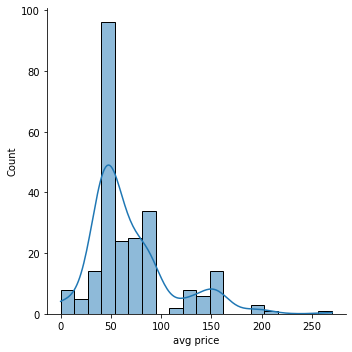

In [16]:
sns.displot(data=salon, x="avg price", kde=True)
## a little positively skewed

In [17]:
salon['avgPriceSQRT'] = np.sqrt(salon['avg price'])

In [18]:
salon.head()

,cancel date,cancel date month,code,service code,service desc,staff,booking date,booking date month,canceled by,days in adv,avg price,staffR,avgPriceSQRT
0,3/10/2018,March,KOOM01,SHCW,Women's hair cut,JJ,4/3/2018,April,JJ,24,88.44,0,9.404254
1,3/27/2018,March,WIL*01,SHCW,Women's hair cut,JJ,3/29/2018,March,JJ,2,88.44,0,9.404254
2,4/3/2018,April,BUDG02,SHCM,Men's hair cut,SINEAD,4/21/2018,April,BECKY,18,41.41,4,6.435060
3,4/3/2018,April,HILJ01,CFC,Color full color,KELLY,4/3/2018,April,JJ,0,63.13,3,7.945439
4,4/3/2018,April,STEM01,SHCW,Women's hair cut,BECKY,4/21/2018,April,JJ,18,67.84,1,8.236504


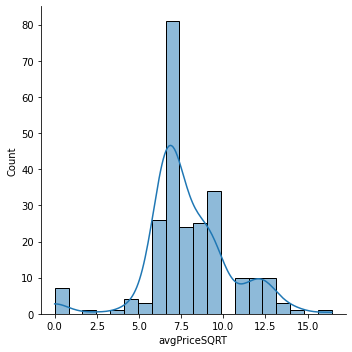

In [19]:
sns.displot(data=salon, x="avgPriceSQRT", kde=True)
# looks more approx. normal

##### Homogeneity of Variance

In [20]:
## we will use both tests, but Bartlett's is the one to use bc our data is approx. normal

In [21]:
scipy.stats.bartlett(salon['avgPriceSQRT'], salon['staffR'])
## this is significant, so the data violates the assumption of homogeneity of variance

BartlettResult(statistic=85.2791342386295, pvalue=2.5908283927286395e-20)

In [22]:
## trying Fligner's test for learning purposes
scipy.stats.fligner(salon['avgPriceSQRT'], salon['staffR'])

FlignerResult(statistic=14.041888591291224, pvalue=0.00017878330489283094)

##### Sample Size

In [23]:
## need at least 20 case per IV
salon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241 entries, 0 to 242
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cancel date         241 non-null    object 
 1   cancel date month   241 non-null    object 
 2   code                241 non-null    object 
 3   service code        241 non-null    object 
 4   service desc        241 non-null    object 
 5   staff               241 non-null    object 
 6   booking date        241 non-null    object 
 7   booking date month  241 non-null    object 
 8   canceled by         241 non-null    object 
 9   days in adv         241 non-null    int64  
 10  avg price           241 non-null    float64
 11  staffR              241 non-null    int64  
 12  avgPriceSQRT        241 non-null    float64
dtypes: float64(2), int64(2), object(9)
memory usage: 26.4+ KB


In [24]:
## 241 enteries meets req. for sample size

##### Independence

In [25]:
## No way to test in R or Python for independence

In [26]:
### End of video

In [27]:
#### Page 8 resumes

## One Way Between Subjects ANOVAs in Python

Now that you have a basic idea about what an ANOVA is, you will learn how to create ANOVAs in Python, starting with the One Way ANOVA

### Remember: Python was not created specifically with statistics in mind, like R was, so there are far fewer options and it is more difficult to test assumptions. You will work within these limitations, but know that if you need to fully explore ANOVAs, R will be your best bet.

In [28]:
## load data
apps = pd.read_csv('../../datasets/googleplaystore.csv')

In [29]:
apps.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content.Rating,Genres,Last.Updated,Current.Ver,Android.Ver
0,1,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,2,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,3,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,4,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,5,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


#### Question Setup

With this data, you will answer the question:

Is there a difference in the number of reviews among the three app categories of beauty, food and drink, and photography? 

In order to answer this question, your x, or independent variable, will be the app categories, which has three levels: beauty, food and drink, and photography. Your y, or dependent variable, will be the reviews. As with all ANOVAs, the IV will be categorical, and the DV will be continuous.

#### Data Wrangling

Depending on the data that you've been given, it may need some wrangling! In this case, although you can run the actual ANOVA using the original data, you can't test the assumptions or run the post hocs unless the data is wrangled.

#### Focusing on the Three Categories

The data has many more categories than three, so you will need to filter the dataset by the categories you want: beauty, food and drink, and photography.

In [30]:
categories = ['BEAUTY', 'FOOD_AND_DRINK','PHOTOGRAPHY']

In [31]:
apps1 = apps['Category'].isin(categories)
apps2 = apps[apps1].copy()

The code above makes a list of the categories you want to keep, then searches through the Category column using the isin() function to keep only those that match. Then, you can apply that list to your actual data frame, being sure to you use the .copy() function to change this from a slice into a data frame.

#### Subsetting to Only the Variables Needed

You only want to keep the two variables you'll need in your test: Category and Reviews.

In [32]:
apps3 = apps2[['Category','Reviews']]

In [33]:
apps3.head()

,Category,Reviews
98,BEAUTY,18900
99,BEAUTY,49790
100,BEAUTY,1150
101,BEAUTY,1739
102,BEAUTY,32090


#### Changing Reviews to an Integer

Your dependent variable will need to be an integer. You can check what format it is in by using the .info() function:

In [34]:
apps3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 98 to 10740
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  515 non-null    object
 1   Reviews   515 non-null    object
dtypes: object(2)
memory usage: 12.1+ KB


Note that both Category and Reviews is a non-null object (string). You'll want to convert Reviews to an integer, then:

In [35]:
apps3.Reviews = apps3.Reviews.astype(int)
## It will give you a warning, because you still technically have a slice masquerading as a data frame:

c:\users\nolan\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [36]:
apps3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 98 to 10740
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  515 non-null    object
 1   Reviews   515 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 10.1+ KB


#### Recoding Category to a Number

The post-hocs and assumptions won't take any string values, so you'll need to recode Category as well:

In [37]:
apps3.Category.value_counts()

PHOTOGRAPHY       335
FOOD_AND_DRINK    127
BEAUTY             53
Name: Category, dtype: int64

In [38]:
dict = {'PHOTOGRAPHY': 0, 'FOOD_AND_DRINK': 1, 'BEAUTY': 2}
apps3['categoryR'] = apps3.Category.replace(dict)
## same warning as above

C:\Users\nolan\AppData\Local\Temp/ipykernel_22564/3631121828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps3['categoryR'] = apps3.Category.replace(dict)


In [39]:
apps3.head()

,Category,Reviews,categoryR
98,BEAUTY,18900,2
99,BEAUTY,49790,2
100,BEAUTY,1150,2
101,BEAUTY,1739,2
102,BEAUTY,32090,2


#### Dropping the Original Category Variable

But wait! You now have three variables again! Go ahead and drop the original Category variable out, since it's mere presence will throw off the work you'll do later.

In [40]:
apps4 = apps3[['categoryR','Reviews']]

In [41]:
apps4.head()

,categoryR,Reviews
98,2,18900
99,2,49790
100,2,1150
101,2,1739
102,2,32090


And finally, eons later, you are all prepared to run a one-way ANOVA and all it's assumptions and post-hoc tests. Phew! R required a lot less wrangling, because it is specifically meant for advanced statistics.

### Test Assumptions

Before you go any further, it's important to test for assumptions. If the assumptions are not met for ANOVA, but you proceeded anyway, you run the risk of biasing your results.

#### Normality

You only need to test for the normality of the dependent variable, since the IV is categorical.

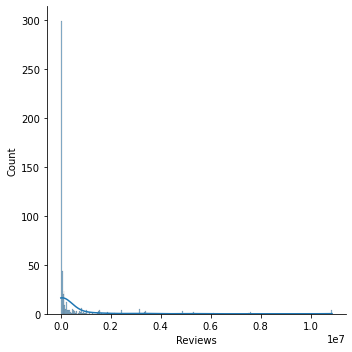

In [42]:
sns.displot(data=apps4, x="Reviews", kde=True)
## not normal, and positively skewed

Looks like that isn't normal in any way - it is very highly positively skewed. So, you'll need to transform price by taking the square root or the log.

In [43]:
apps4['ReviewsSQRT'] = np.sqrt(apps4['Reviews'])

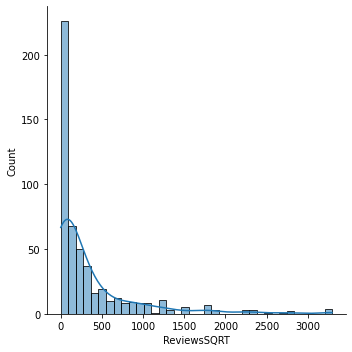

In [44]:
sns.displot(data=apps4, x="ReviewsSQRT", kde=True)

That looks relatively normal, so keep it there:

#### Homogeneity of Variance

Just like in R, you can test for homogeneity of variance easily using either Bartlett's test or Fligner's Test. Bartlett's test is for when your data is normally distributed, and Fligner's test is for when your data is non-parametric. No matter which test you are using, you are looking for a non-significant test. The null hypothesis for both of these is that the data has equal variance, so you'd like to have a p value of > .05. Since you have corrected your data, you can use Bartlett's test, but just for learning purposes, you'll try both here.



##### Bartlett's Test

To do Bartlett's test, use the function scipy.stats.bartlett(), with the argument of the y data, followed by the x data.

In [45]:
scipy.stats.bartlett(apps4['ReviewsSQRT'], apps4['categoryR'])

BartlettResult(statistic=6187.981817647615, pvalue=0.0)

The p value associated with this test is < .05, which means that unfortunately, you have violated the assumption of homogeneity of variance.

##### Fligner's Test

To perform Fligner's test, use the function scipy.stats.fligner(), with the argument of the y data, followed by the x data.

In [46]:
scipy.stats.fligner(apps4['ReviewsSQRT'], apps4['categoryR'])

FlignerResult(statistic=642.0602581715318, pvalue=1.1908711834100128e-141)

The p value is still < .05, which means you have violated the assumption of homogeneity of variance.

#### Correcting for Violations of Homogeneity of Variance

As you know, there are many different ways to correct for this violation in the general field of statistics. However, Python does not support any of them! Which means that you can run the ANOVA, but there is a good chance it will be inaccurate. If you do choose to proceed with the analysis in Python, ensure that all parties consuming your results understand that there could be inaccuracies with the data analysis!

It is recommended, however, that if you violate the assumption of homogeneity of variance that you switch over to R, and proceed from there. You are becoming a guru in both languages for a reason!

#### Sample Size

An ANOVA requires a sample size of at least 20 per independent variable. In this case, you only have one independent variable, so as long as you have at least 20 cases, you are fine. Looking at the data, the n is 515, so you are fine to proceed with this assumption!

In [47]:
apps4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 98 to 10740
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   categoryR    515 non-null    int64  
 1   Reviews      515 non-null    int32  
 2   ReviewsSQRT  515 non-null    float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 14.1 KB


#### Independence

There is no statistical test for the assumption of independence, so you can proceed!

In [48]:
#### page 9 (One Way Between Subjects ANOVA in Python Part 2)

In [49]:
## starts with a video

In [51]:
## load in salon data from video
## load data
salon = pd.read_csv('../../datasets/client_cancellations.csv')

In [58]:
## she has the data carried over from previous video - need to make columns she already has
salon.head()

,cancel date,cancel date month,code,service code,service desc,staff,booking date,booking date month,canceled by,days in adv,avg price,avgPriceSQRT
0,3/10/2018,March,KOOM01,SHCW,Women's hair cut,JJ,4/3/2018,April,JJ,24,88.44,9.404254
1,3/27/2018,March,WIL*01,SHCW,Women's hair cut,JJ,3/29/2018,March,JJ,2,88.44,9.404254
2,4/3/2018,April,BUDG02,SHCM,Men's hair cut,SINEAD,4/21/2018,April,BECKY,18,41.41,6.435060
3,4/3/2018,April,HILJ01,CFC,Color full color,KELLY,4/3/2018,April,JJ,0,63.13,7.945439
4,4/3/2018,April,STEM01,SHCW,Women's hair cut,BECKY,4/21/2018,April,JJ,18,67.84,8.236504


In [57]:
salon['avgPriceSQRT'] = np.sqrt(salon['avg price'])
salon.head()

,cancel date,cancel date month,code,service code,service desc,staff,booking date,booking date month,canceled by,days in adv,avg price,avgPriceSQRT
0,3/10/2018,March,KOOM01,SHCW,Women's hair cut,JJ,4/3/2018,April,JJ,24,88.44,9.404254
1,3/27/2018,March,WIL*01,SHCW,Women's hair cut,JJ,3/29/2018,March,JJ,2,88.44,9.404254
2,4/3/2018,April,BUDG02,SHCM,Men's hair cut,SINEAD,4/21/2018,April,BECKY,18,41.41,6.435060
3,4/3/2018,April,HILJ01,CFC,Color full color,KELLY,4/3/2018,April,JJ,0,63.13,7.945439
4,4/3/2018,April,STEM01,SHCW,Women's hair cut,BECKY,4/21/2018,April,JJ,18,67.84,8.236504


In [62]:
salon.dropna(inplace=True)

## running the analysis

In [63]:
salon.staff.value_counts()

JJ        68
BECKY     61
JOANNE    45
KELLY     44
SINEAD    19
TANYA      4
Name: staff, dtype: int64

In [64]:
stats.f_oneway(salon['avgPriceSQRT'][salon['staff']=='JJ'],
              salon['avgPriceSQRT'][salon['staff']=='BECKY'],
              salon['avgPriceSQRT'][salon['staff']=='JOANNE'],
              salon['avgPriceSQRT'][salon['staff']=='KELLY'],
              salon['avgPriceSQRT'][salon['staff']=='SINEAD'],
              salon['avgPriceSQRT'][salon['staff']=='TANYA'])

F_onewayResult(statistic=8.109764971308326, pvalue=4.4521793522335193e-07)

In [65]:
## this shows significant difference between staff members and the average price they bring in. But how do we know which is better? Through post hocs with Tukeys

In [66]:
postHoc = MultiComparison(salon['avgPriceSQRT'], salon['staff'])

In [67]:
postHocResults = postHoc.tukeyhsd()

In [68]:
print(postHocResults)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 BECKY     JJ   1.0707 0.1053 -0.1199  2.2612  False
 BECKY JOANNE   2.8075  0.001  1.4809  4.1342   True
 BECKY  KELLY   0.9295 0.3456 -0.4058  2.2648  False
 BECKY SINEAD   0.2797    0.9 -1.4939  2.0534  False
 BECKY  TANYA  -0.1675    0.9 -3.6519  3.3169  False
    JJ JOANNE   1.7369 0.0021  0.4396  3.0342   True
    JJ  KELLY  -0.1412    0.9 -1.4473   1.165  False
    JJ SINEAD   -0.791 0.7595 -2.5428  0.9609  False
    JJ  TANYA  -1.2382    0.9 -4.7115  2.2352  False
JOANNE  KELLY   -1.878 0.0028 -3.3093 -0.4468   True
JOANNE SINEAD  -2.5278 0.0015 -4.3749 -0.6808   True
JOANNE  TANYA   -2.975 0.1512 -6.4973  0.5473  False
 KELLY SINEAD  -0.6498    0.9  -2.503  1.2035  False
 KELLY  TANYA   -1.097    0.9 -4.6226  2.4286  False
SINEAD  TANYA  -0.4472    0.9 -4.1611  3.2666  False
----------------------------------------------

In [69]:
## if 'reject' column is true. We reject the null hypothesis. Meaning that there is a significant difference betweenthe two staff members.

In [70]:
## We do not get to see the p-value here - to examine which staff member is better, we need to look at the means

In [71]:
salon.groupby('staff').mean()

,days in adv,avg price,avgPriceSQRT
staff,,,
BECKY,7.295082,51.064590,6.896776
JJ,5.029412,66.325588,7.967442
JOANNE,4.488889,108.042444,9.704312
KELLY,3.863636,66.137727,7.826262
SINEAD,7.368421,52.733684,7.176490
TANYA,2.000000,52.222500,6.729286


In [72]:
## Joanne brings in almost double what every other staff member brings in

In [74]:
#### end of video

In [75]:
## Page 9 text

### Computing ANOVAs with Equal Variance (Met Homogeneity of Variance Assumption)

In this case, your data did not meet this assumption, but for the purposes of learning, you'll be shown what to do if you had.

Below is the code to run a one-way ANOVA in Python:

In [81]:
stats.f_oneway(apps3['Reviews'][apps3['Category']=='BEAUTY'],
               apps3['Reviews'][apps3['Category']=='FOOD_AND_DRINK'],
               apps3['Reviews'][apps3['Category']=='PHOTOGRAPHY'])

F_onewayResult(statistic=11.467490725511773, pvalue=1.342932747373518e-05)

Not much here, is there? Just the F value, under the name statistic, and the p value. Since the p value is less than .05, there is a significant difference in Reviews between these three categories.

### Computing ANOVAs with Unequal Variance (Violated Homogeneity of Variance Assumption)

There is NO WAY to compute ANOVAs with unequal variance in Python! Either switch over to R or be VERY CAUTIOUS when interpreting your results and don't use for anything high stakes!

#### Post Hocs

It's important to run post-hocs to figure out what groups significantly differed from each other. In Python, the only automatically coding for post-hocs that is available is the Tukey post hoc, so that is what you will learn.

#### Computing Post Hocs with Tukey's

Here is the code for computing a Tukey's post hoc in Python. First you use the MultiComparison() function to specify the variables to use. Then, you call the tukeyhsd() function to run the Tukey's correction on the data. Finally, you can print the results, which are shown below:

In [86]:
postHoc = MultiComparison(apps4['ReviewsSQRT'], apps4['categoryR'])
postHocResults = postHoc.tukeyhsd()
print(postHocResults)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2 meandiff p-adj    lower     upper   reject
--------------------------------------------------------
     0      1 -307.584  0.001 -438.3491  -176.819   True
     0      2 -419.474  0.001 -604.9768 -233.9713   True
     1      2  -111.89 0.4078 -317.0966   93.3166  False
--------------------------------------------------------


Interpreting this is a little harder than in R, because you've been forced to recode your categorical IV to have numbers instead. So, make sure you refer back to that recode command to remember which number is which. 0 stands for photography, 1 stands for food and drink apps, and 2 stands for beauty apps. This output provides you with the mean difference in the number of reviews per comparison, plus the confidence interval (lower and upper columns), and whether or not you can reject the null hypothesis. If the value in the reject column is True, then this means there was a significant difference in the means between those groups. So, there is a significant difference between the number of reviews between photography and both beauty and food and drink apps. What is that difference? Well, you will have to examine the means.

### Computing Post Hocs When You've Violated the Assumption of Homogeneity of Variance

There is NO WAY to compute post hocs with unequal variance in Python! Either switch over to R or be VERY CAUTIOUS when interpreting your results and don't use for anything high stakes!

### Determine Means and Draw Conclusions

The last step is just to examine the means, to determine which apps had the highest and lowest number of reviews.

In [88]:
apps4.groupby('categoryR').mean()

,Reviews,ReviewsSQRT
categoryR,,
0,637363.134328,468.328067
1,69947.480315,160.744038
2,7476.226415,48.854024


Looking at the reviews column, which has the means, you can say that photography apps had significantly more reviews than both beauty and food and drink apps.

In [89]:
## Page 10 is activity to turn in